In [108]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from cant_hide_money_bot.store import Store
from cant_hide_money_bot import std, book as book_lib

In [88]:
store = Store(std.Mode.DEV)
book = store.load_book()

In [89]:
book = book_lib.compute_shares_and_dollars(book)
book['abs_dollars'] = book['dollars'].apply(abs)

In [90]:
m2p_capital_guild_id = 738605371215839243
book = book[book['guild_id'] == m2p_capital_guild_id]

In [91]:
book

,symbol,dir,qty,time,price,trader,guild_id,mult,shares,dollars,abs_dollars
2,XLK,BUY,1000,2021-01-04 10:25:50.888259,129.77,kel#6179,738605371215839243,1,1000,"-129,770.00000000001","129,770.00000000001"
4,ARKF,BUY,1000,2021-01-04 10:34:43.207562,49.97,dux#8284,738605371215839243,1,1000,"-49,970.0","49,970.0"
5,GME,BUY,5000,2021-01-04 10:38:10.152155,17.33,djruhnke#7977,738605371215839243,1,5000,"-86,649.99999999999","86,649.99999999999"
6,PLUG,BUY,500,2021-01-04 10:39:00.055781,33.18,eileen#3348,738605371215839243,1,500,"-16,590.0","16,590.0"
7,XPEV,SELL,8156,2021-01-04 10:39:05.022806,46.62,djruhnke#7977,738605371215839243,-1,-8156,"380,232.72","380,232.72"
...,...,...,...,...,...,...,...,...,...,...,...
76,ARKK,BUY,100,2021-02-12 22:27:39.324626,156.58,kel#6179,738605371215839243,1,100,"-15,658.000000000002","15,658.000000000002"
77,XLK,SELL,1000,2021-02-12 22:28:17.565631,138.59,kel#6179,738605371215839243,-1,-1000,"138,590.0","138,590.0"
78,IYR,SELL,100,2021-02-12 22:28:31.445740,89.54,kel#6179,738605371215839243,-1,-100,"8,954.0","8,954.0"
81,GOOG,BUY,1,2021-02-12 23:42:22.963726,"2,104.11",kel#6179,738605371215839243,1,1,"-2,104.11","2,104.11"


In [92]:
trades_by_trader = book.groupby('trader')

# Number of trades per trader

<AxesSubplot:ylabel='trader'>

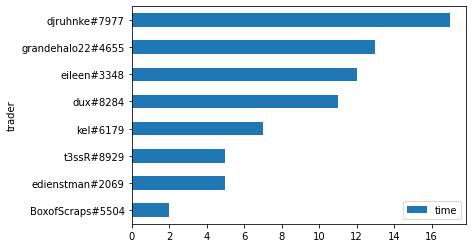

In [93]:
trades_by_trader.agg({'time': 'count'}).sort_values('time').plot.barh()

# Average/median trade size by dollars traded

<AxesSubplot:ylabel='trader'>

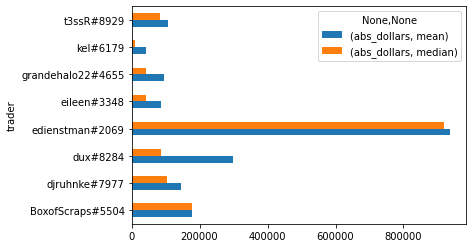

In [94]:
 trades_by_trader.agg({'abs_dollars': [np.mean, np.median]}).plot.barh()

# Portfolio value over time

<Figure size 432x288 with 0 Axes>

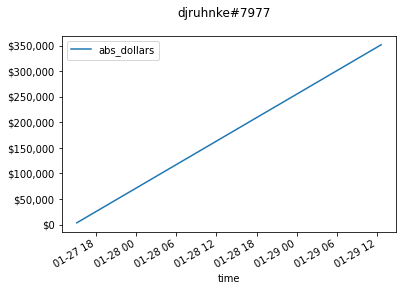

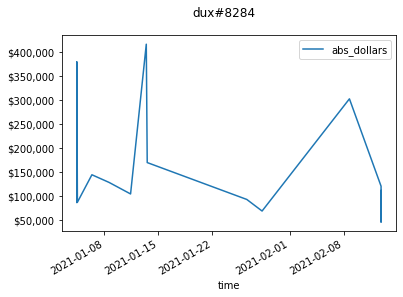

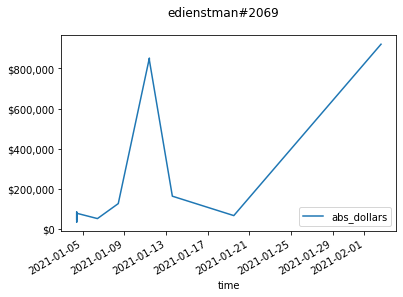

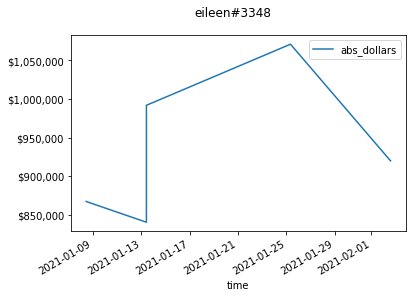

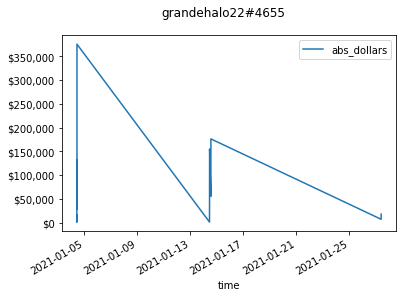

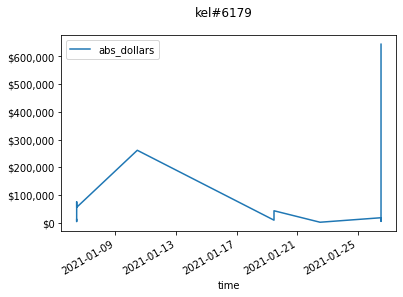

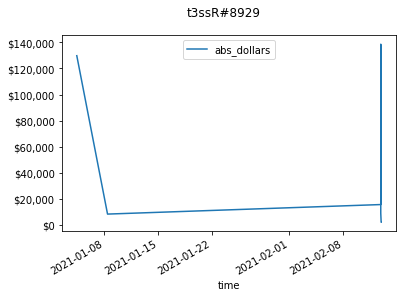

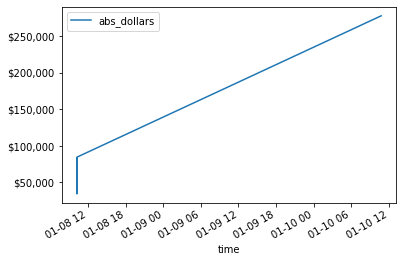

In [110]:
for trader, trades in trades_by_trader:
    plt.suptitle(trader)
    tick = matplotlib.ticker.StrMethodFormatter('${x:,.0f}')
    trades.plot(x='time', y='abs_dollars').get_yaxis().set_major_formatter(tick)